<mark><font size=3>**중앙대학교 인문콘텐츠연구소 비전공자를 위한 2022 여름 프로그래밍 강좌 (5/5)**</font></mark><br/>
<font color=MediumSeaGreen size=5>**Colab을 활용한 파이썬 텍스트 분석 입문**</font>  <font color=black size=5></font> 🐍

---

---
## **오늘 배울 내용: 텍스트 분석 2**

##### 1. 한국어 라임 (rhyme) 찾기
##### 2. 나이브 베이즈 분류기 (naive Bayes classifier) 처음부터 구현하기
##### 3. scikit-learn 라이브러리를 활용한 나이브 베이즈 분류


---
### **1. 한국어 라임(Rhyme) 찾기**

---
### **1-0. 라임(rhyme)이란? (한국어 힙합 가사 속 라임을 중심으로)**

라임(rhyme)은 우리말로 '압운(押韻)'이라고 하는데, 

"*시(詩)에서 시행의 일정한 자리에 발음이 비슷한 음절의*

*같은 운이 규칙적으로 들어가는 것"*을 뜻합니다. 

(출처: https://ko.wikipedia.org/wiki/%EC%95%95%EC%9A%B4)

예를 들어, 아래의 1번과 2번은 한국어 힙합 가사 속 라임(rhyme)인데,

1. **'상'**으로 끝나는 단어로 라임을 넣은 경우

> <font color='blue'>세**상** 이**상** 너무나도 괴**상** 너희가 최고라니 그건 너무 환**상**</font><br/>
*-- '너희가 힙합을 아느냐?' by 드렁큰 타이거*

2. 모음 **'ㅏ', 'ㅣ', 'ㅔ'** 또는 비슷한 모음 구성을 갖는 단어들로 라임을 만든 경우

> <font color='blue'>**얄밉게** **따귈 때**리며 **날 일깨**우는 알**람시계**에 **잠이 깨**,<br/>
고**양이 세**술 하며 **아침 해**를 **맞이해**.<br/>
빨**간 핏대**가 **잡힌 내** 흰**자위엔** 아직 잠이 쏟**아지네**.<br/>
식**탁 위에** 아무렇게나 **방치된** **참치 캔**을 **깐 뒤에**<br/>
무작정 씹어 **삼키네**.</font><br/>
*-- '보물찾기' by 화나*

\- \- \-

한국어 라임을 검색하는 웹사이트도 있습니다. 

http://rhymenote.com/list

('이상', '나이테'로 검색.)

\- \- \-

여기서는 위의 '라임 노트' 검색 시스템과 비슷한 결과를 돌려 주는 프로그램을 구현해 보겠습니다.

예를 들어 '아버지'를 입력하면, **'ㅏ', 'ㅓ', 'ㅣ'**라는

모음에 주목하여 아래와 같이 비슷한 모음의 배열을 가지는 

- '큰아버지', ...
- '나머지', '막걸리', '말없이', '아버님', '아버지', '아저씨', '할머니', ...
- '거기', '거리', '거실', '거짓', '걷기', '껍질', '널리', '머리', '먹이', '먼지', '멀리', '번지', ...

와 같은 단어를 검색하는 프로그램을 어떻게 구현할 수 있는지 살펴 보겠습니다.

---
### **1-1. 한글 유니코드**

먼저 한글이 컴퓨터에서 어떻게 다뤄지는지를 알아 보겠습니다. 

그러기 위해서는 **유니코드**를 알아야 합니다.

"**유니코드(영어: Unicode)는 전 세계의 모든 문자를** 

**컴퓨터에서 일관되게 표현하고 다룰 수 있도록 설계된 산업 표준**이고,

유니코드 협회(Unicode Consortium)가 제정"합니다. 

(출처: https://ko.wikipedia.org/wiki/%EC%9C%A0%EB%8B%88%EC%BD%94%EB%93%9C)

- 유니코드 협회 홈페이지: https://home.unicode.org/

*Unicode provides a unique number for every character, no matter what the platform, program, or language is.*

- https://en.wikipedia.org/wiki/List_of_Unicode_characters 

- **[Hangul in Unicode](https://en.wikipedia.org/wiki/Korean_language_and_computers#Hangul_in_Unicode)**


---
### **1-2. 파이썬 jamo 패키지를 이용한 한글 자모 분리**

'아버지'에서 **'ㅏ', 'ㅓ', 'ㅣ'**를 추출하기 위해서는 

**자음**과 **모음**을(자모를) 먼저 **분리**한 뒤 모음을 추출해야 합니다.

다행히 한글 자모를 자동으로 분리해주는 파이썬 **jamo** 패키지가 있습니다.

https://github.com/JDongian/python-jamo

사용법: https://python-jamo.readthedocs.io/en/latest/


In [1]:
# 먼저 jamo 파이썬 패키지를 설치

!pip install jamo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 관련 패키지를 탑재(import)함

from jamo import h2j, j2hcj

In [3]:
text = "동해물과 백두산이 마르고 닳도록"
jm = j2hcj(h2j(text))
jm

'ㄷㅗㅇㅎㅐㅁㅜㄹㄱㅘ ㅂㅐㄱㄷㅜㅅㅏㄴㅇㅣ ㅁㅏㄹㅡㄱㅗ ㄷㅏㅀㄷㅗㄹㅗㄱ'

In [4]:
print(jm[0])

ㄷ


그럼 여기서 자음 'ㄷ'의 유니코드 값이 무엇인지 확인해 보겠습니다.

파이썬 **ord()** 함수는 문자의 유니코드 값을 돌려주는 함수입니다.

https://www.programiz.com/python-programming/methods/built-in/ord

In [5]:
print(ord(jm[0]))   # jm[0] --> 'ㄷ'

12599


'ㄷ'의 유니코드 정보: https://en.wiktionary.org/wiki/Appendix:Unicode/Hangul_Compatibility_Jamo



그렇다면 Hangul Compatibility Jamo 가 아니라 **그냥 Hangul Jamo** 에서의 유니코드 값은 무엇일까요?

In [6]:
char = '동'
hj = h2j(char)
print(hj)
type(hj)

동


str

In [7]:
print('character length:', len(char))
print('hangul jamo length:', len(hj))

character length: 1
hangul jamo length: 3


In [8]:
print(hj[0], hj[1], hj[2])

ᄃ ᅩ ᆼ


In [9]:
# hangul jamo 에서의 'ㄷ'의 유니코드 값은? (초성 'ㄷ')

ord(hj[0])  # print(ord(jm[0])) --> 12599

4355

https://en.wiktionary.org/wiki/%E3%84%B7

In [10]:
# 그럼 종성 'ㄷ'의 hangul jamo 값은?
hj = h2j('걷')
print(hj[0], hj[1], hj[2])
ord(hj[2])

ᄀ ᅥ ᆮ


4526

---
❓ 파이썬 jamo 패키지를 설치한 후, 

'백두산'이라는 단어의 한글 자모를 취득하고, (bds라는 변수에 할당)

또, ('ㅅ', 'ㅏ', 'ㄻ') 이라는 자모 튜플을 '삶'으로 합체하고, (slm이라는 변수에 할당)

아래에 있는 print 문 2개를 출력하세요. 

(자모 합체는 https://python-jamo.readthedocs.io/en/latest/ 의 Hangul Synthesis 부분 참조.)

```
백두산 자모 분해: ㅂㅐㄱㄷㅜㅅㅏㄴ
ㅅㅏㄻ 자모 합체: 삶
```


In [11]:
from jamo import h2j, j2hcj, j2h

bds = j2hcj(h2j("백두산"))
slm = j2h('ㅅ', 'ㅏ', 'ㄻ')

print("백두산 자모 분해:", bds)
print("ㅅㅏㄻ 자모 합체:", slm)

백두산 자모 분해: ㅂㅐㄱㄷㅜㅅㅏㄴ
ㅅㅏㄻ 자모 합체: 삶


---
### **1-3. jamo 패키지를 이용하여 한국어 라임 검색**

'아버지'를 입력하면, 'ㅏ', 'ㅓ', 'ㅣ'라는 모음에 주목하여 

비슷한 모음 배열을 가지는 단어를 검색하는 프로그램을 만들어 보겠습니다.

구현 절차는 아래와 같습니다.

\- \- \-

(1) 먼저 검색 대상 단어로 '자주 쓰이는 한국어 낱말 5800' (실제로는 5888 단어)을 수집합니다.

```
word_list = ['가게', '가격', '가구', '가구', '가까워지다', ...]
```
https://ko.wiktionary.org/wiki/%EB%B6%80%EB%A1%9D:%EC%9E%90%EC%A3%BC_%EC%93%B0%EC%9D%B4%EB%8A%94_%ED%95%9C%EA%B5%AD%EC%96%B4_%EB%82%B1%EB%A7%90_5800

(예전에 웹 스크레이핑 때 썼던 코드를 재사용합니다.)

<br/>

(2) 수집한 단어의 자모를 분리하여 파이썬 딕셔너리에 저장합니다. (아래와 같은 형태.)

```
jamo_dict = {'글자': ['ㄱ', 'ㅡ', 'ㄹ', 'ㅈ', 'ㅏ'], 
             '법칙': ['ㅂ', 'ㅓ', 'ㅂ', 'ㅊ', 'ㅣ', 'ㄱ'], 
             '학생': ['ㅎ', 'ㅏ', 'ㄱ', 'ㅅ', 'ㅐ', 'ㅇ'], ...}
```
<br/>

(3) 수집한 단어의 자모에서 모음만 추출합니다.
```
vowel_dict = {'글자': ('ㅡ', 'ㅏ'), 
              '법칙': ('ㅓ', 'ㅣ'), 
              '학생': ('ㅏ', 'ㅐ'), ...}   

# ('ㅡ', 'ㅏ') --> 튜플 자료형
```
<br/>

(4) 고유한 모음 배열을 뽑아냅니다. (set( ) 함수 활용.)

> ('ㅡ', 'ㅏ'), ('ㅡ', 'ㅏ'), ('ㅡ', 'ㅏ') --> ('ㅡ', 'ㅏ')

<br/>

(5) 모음 배열이 같은 단어끼리 묶어줍니다.
```
vowel_word_dict = {('ㅏ', 'ㅗ', 'ㅓ'): ['감동적', '창조적'], 
                   ('ㅏ', 'ㅗ', 'ㅗ'): ['알코올'], 
                   ('ㅏ', 'ㅗ', 'ㅚ', 'ㅏ'): ['감소되다', '반복되다', '잘못되다'], ...}
```
<br/>

(6) 주어진 모음 배열의 부분 모음 배열을 추출합니다.
```
expanded_vowel_dict = {('ㅣ', 'ㅏ', 'ㅚ', 'ㅏ'): [('ㅚ', 'ㅏ'), ('ㅏ', 'ㅚ', 'ㅏ')], ...}
```
<br/>

(7) 사용자가 단어를 입력하면 라임(rhyme)이 되는 단어를 제시합니다. (while 문 사용.)

> 입력: '아버지'<br/>
출력: <br/>
\['나머지', '막걸리', '말없이', '아버님', '아버지', '아저씨', '할머니', ...\]<br/>
\['거기', '거리', '거실', '거짓', '걷기', '껍질', '널리', '머리', '먹이', '먼지', '멀리', '번지', ...\]


---
**(1) 검색 대상 단어를 수집**

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://ko.wiktionary.org/wiki/%EB%B6%80%EB%A1%9D:%EC%9E%90%EC%A3%BC_%EC%93%B0%EC%9D%B4%EB%8A%94_%ED%95%9C%EA%B5%AD%EC%96%B4_%EB%82%B1%EB%A7%90_5800"

response = requests.get(url)
html_doc = response.text

soup = BeautifulSoup(html_doc, 'html.parser')

dd = soup.find_all('dd')
del dd[0]

word_list = []
for each in dd:
  word  = each.get_text()
  word_list.append(word)

word_list.sort()

print(word_list)
len(word_list)

In [13]:
word_set = set(word_list)   # '가까이', 가다', '따르다' 등 동음이의어가 다수 포함되어 있어서 중복을 제거함.
word_list = list(word_set)
word_list.sort()
len(word_list)   

5469

**(2) 각 단어의 자모를 분리하여 파이썬 딕셔너리에 저장**

```jamo_dict = {'글자': ['ㄱ', 'ㅡ', 'ㄹ', 'ㅈ', 'ㅏ'], ...} ```

In [14]:
# 자모 분리 적용

jm = j2hcj(h2j('냄비'))
jm

'ㄴㅐㅁㅂㅣ'

In [15]:
# 문자열에 list( ) 함수에 적용하면 개별 글자를 요소로 하는 리스트를 확보할 수 있음

list(jm)

['ㄴ', 'ㅐ', 'ㅁ', 'ㅂ', 'ㅣ']

In [ ]:
from jamo import h2j, j2hcj

jamo_dict = {}

for word in word_list:
  jm = j2hcj(h2j(word))

  jamo_dict[word] = list(jm)

print(jamo_dict)
print(len(jamo_dict))

**(3) 수집한 단어의 자모에서 모음만 추출**

https://en.wikipedia.org/wiki/Korean_language_and_computers#Hangul_in_Unicode

```vowel_dict = {'글자': ('ㅡ', 'ㅏ'), ...}```

In [ ]:
# jamo_dict 의 각 단어의 자모 분리된 문자열에서 모음만 추출함

vowel_list = ['ㅏ', 'ㅑ', 'ㅓ', 'ㅕ', 'ㅗ', 'ㅛ', 'ㅜ', 'ㅠ', 'ㅡ', 'ㅣ', 'ㅐ', 'ㅒ', 'ㅔ', 'ㅖ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅢ']
print("num of vowels:", len(vowel_list))

vowel_dict = {}

for word, jamo_list in jamo_dict.items():
  # word: '글자'
  # jamo_list: ['ㄱ', 'ㅡ', 'ㄹ', 'ㅈ', 'ㅏ']

  vowel_tuple = ()   # 튜플

  # 모음만 골라내서 튜플에 저장
  for jm in jamo_list:
    if jm in vowel_list:
      vowel_tuple += (jm,)   # https://stackoverflow.com/questions/53984406/efficient-way-to-add-elements-to-a-tuple

  vowel_dict[word] = vowel_tuple

print(vowel_dict)
print(len(vowel_dict))

**(4) 고유한 모음 배열을 추출**

In [ ]:
# 고유한 모음 배열 찾아내기

vowel_combo = vowel_dict.values()
print(vowel_combo)
print(len(vowel_combo), '\n')

uniq_vowel_combo = set(vowel_combo)
print(uniq_vowel_combo)
print(len(uniq_vowel_combo))

**(5) 모음 배열이 비슷한 단어끼리 통합**

In [ ]:
'''
어떻게 문제를 해결할 지 실험하여 확인 1
'''

# https://www.geeksforgeeks.org/python-get-key-from-value-in-dictionary/

# list keys and values separately
word_list = list(vowel_dict.keys())
vowel_combo_list = list(vowel_dict.values())

print(word_list)
print(vowel_combo_list)

position = vowel_combo_list.index(('ㅏ', 'ㅓ'))   # 특정 모음 배열이 있는 첫 번째 위치의 인덱스를 취득

print(position)
print(word_list[position])   # 위의 인덱스를 이용하여 해당 모음 배열의 첫 번째 단어를 취득
print(vowel_combo_list[position]) 

---
👉 [여기서 잠깐!]

for 문에서 **enumerate( )** 함수를 이용하면 **리스트의 인덱스와 요소**를 동시에 꺼낼 수 있습니다.

In [20]:
letters = ['a', 'b', 'c']
for i, char in enumerate(letters):
  print(i, char)

0 a
1 b
2 c


In [ ]:
'''
어떻게 문제를 해결할 지 실험하여 확인 2
'''

# https://www.geeksforgeeks.org/python-get-the-indices-of-all-occurrences-of-an-element-in-a-list/

# list out keys and values separately
word_list = list(vowel_dict.keys())
vowel_combo_list = list(vowel_dict.values())

# 특정 모음 조합에 해당하는 요소들의 인덱스를 모조리 취득
indices = []

for index, element in enumerate(vowel_combo_list):
  if element == ('ㅏ', 'ㅓ'):
    indices.append(index)

print('대상 모음 조합:', "('ㅏ', 'ㅓ')")
print(indices)
for i in indices[:5]:   # 해당되는 단어 다섯 개만 출력
  print(word_list[i])

In [ ]:
'''
실험 결과를 본 코드에 적용
'''
# 모음 배열을 key 로 하는 단어 목록 작성하기

# list out keys and values separately
word_list = list(vowel_dict.keys())   # 아이, 나이, 나비, 먹구름, 아버지, ...
vowel_combo_list = list(vowel_dict.values())  # ('ㅏ', 'ㅣ'), ('ㅏ', 'ㅓ', 'ㅣ'), ...

vowel_word_dict = {}   # {(vowel1, vowel2): ['word1', 'word2', ...]} dictionary

# vowel_combo 에는 고유한 모음 배열이 들어있음
# vowel_combo = {('ㅕ', 'ㅔ'), ('ㅐ', 'ㅏ', 'ㅗ'), ('ㅐ', 'ㅠ'), ..,}

for vc in vowel_combo:
  # 최종적으로 만들어야 하는 딕셔너리를 
  # 고유 모음 배열을 key로 하고 
  # 단어 리스트를 value로 하도록 정의함
  vowel_word_dict[vc] = []   
  indices = []

  for index, element in enumerate(vowel_combo_list):
    if element == vc:   # 고유한 모음 배열과 일치하면
      indices.append(index)   # 인덱스를 리스트에 저장

  for i in indices:   # 인덱스를 돌리면서
    vowel_word_dict[vc].append(word_list[i])   # 해당되는 단어들을 리스트에 저장

vowel_word_dict    

In [ ]:
print(vowel_word_dict)

In [ ]:
# 딕셔너리 정렬하기
# https://www.geeksforgeeks.org/python-sort-dictionary-key-and-values-list/

# Sort Dictionary key and values List
# Using loop + dictionary comprehension

sorted_vowel_word_dict = dict()
for key in sorted(vowel_word_dict):
	sorted_vowel_word_dict[key] = sorted(vowel_word_dict[key])

# printing result
print("The sorted dictionary : " + str(sorted_vowel_word_dict))

**(6) 주어진 모음 배열의 부분 모음 배열을 추출**

> 예: ('ㅏ', 'ㅏ', 'ㅜ', 'ㅔ')의 부분 모음 배열로 [('ㅏ', 'ㅜ', 'ㅔ'), ('ㅜ', 'ㅔ')] 가 있음.

```expanded_vc_dict = {('ㅏ', 'ㅏ', 'ㅜ', 'ㅔ'): [('ㅜ', 'ㅔ'), ('ㅏ', 'ㅜ', 'ㅔ')], ...}```



In [25]:
'''
어떻게 문제를 해결할 지 실험하여 확인
'''

# https://www.geeksforgeeks.org/python-find-maximum-length-sub-list-in-a-nested-list/
# 먼저 우리가 가지고 있는 단어들의 모음 배열의 최장 길이(max length)를 확인

sample_vowel_combo = [('ㅚ', 'ㅗ', 'ㅏ'), ('ㅓ', 'ㅏ', 'ㅏ'), ('ㅠ', 'ㅕ', 'ㅏ', 'ㅏ'), ('ㅏ', 'ㅏ', 'ㅜ', 'ㅓ')]
max(len(x) for x in sample_vowel_combo)

4

In [ ]:
# 가장 긴 모음 배열 구하기

print(sorted_vowel_word_dict.keys())
print(max(len(x) for x in sorted_vowel_word_dict.keys()))

In [ ]:
# 가장 긴 모음 배열의 크기는 6
# 모음 배열의 부분 모음 배열 찾아내기

expanded_vowel_dict = {}
vowel_combo_list = sorted_vowel_word_dict.keys()


for vowel_combo in vowel_combo_list:
  # 모음 배열이 2 보다 큰 경우를 선별
  if len(vowel_combo) > 2:
    # 모음 부분 모음 딕셔너리를 초기화
    expanded_vowel_dict[vowel_combo] = []

    # 끝(오른쪽)에서 두 개의 모음이 존재할 경우
    if vowel_combo[-2:] in vowel_combo_list:
      expanded_vowel_dict[vowel_combo].append(vowel_combo[-2:])

for vowel_combo in vowel_combo_list:
  if len(vowel_combo) > 3:
    if vowel_combo[-3:] in vowel_combo_list:
      expanded_vowel_dict[vowel_combo].append(vowel_combo[-3:])

for vowel_combo in vowel_combo_list:
  if len(vowel_combo) > 4:
    if vowel_combo[-4:] in vowel_combo_list:
      expanded_vowel_dict[vowel_combo].append(vowel_combo[-4:])
      
for vowel_combo in vowel_combo_list:
  if len(vowel_combo) > 5:
    if vowel_combo[-5:] in vowel_combo_list:
      expanded_vowel_dict[vowel_combo].append(vowel_combo[-5:])      

expanded_vowel_dict

👉 [여기서 잠깐!]

**우리가 지금까지 정의한 리스트와 딕셔너리는 아래와 같습니다.**

1. 검색 대상 단어 리스트<br/>
```word_list = ['가게', '가격', '가구', '가구', '가까워지다', ...]```

2. 단어의 모음을 추출한 딕셔너리<br/>
``` vowel_dict = {'가게': ('ㅏ', 'ㅔ'), '가격': ('ㅏ', 'ㅕ'), '가구': ('ㅏ', 'ㅜ'), ...}```

3. 모음 배열을 key로 하고, 해당 모음 배열을 가지는 단어의 리스트를 value로 하는 딕셔너리<br/>
```sorted_vowel_word_dict = {('ㅏ',): ['각', '간', '감', '갑', '값', ...}```

4. 모음 배열의 부분 모음 배열을 정의한 딕셔너리<br/>
```expanded_vowel_dict = {('ㅏ', 'ㅏ', 'ㅏ'): [('ㅏ', 'ㅏ')], ('ㅏ', 'ㅏ', 'ㅏ', 'ㅏ'): ...}```



In [ ]:
print(word_list)

In [ ]:
print(vowel_dict)

In [ ]:
print(sorted_vowel_word_dict)

In [ ]:
print(expanded_vowel_dict)

**(7) 사용자가 단어를 입력하면 라임(rhyme) 단어를 제시**

위의 딕셔너리들을 이용하여 사용자가 입력한 단어에 라임되는 단어를 검색해 보겠습니다. (while 문 사용.)

- 임의의 (단어 / '랜덤' / 엔터) 중 하나를 사용자로 하여금 입력하도록 함
 - 엔터(빈 문자열)가 입력되면 질의응답을 종료함
 - '랜덤이 입력되면 단어 목록에 있는 단어 하나를 무작위로 선택함
 - 단어가 입력되면 이 단어를 사용함

<br/>

- 만약 단어가 단어 목록에 들어 있으면 모음 배열을 추출함 ```vowel_dict```
- 단어가 단어 목록에 없으면 "죄송합니다"를 출력하고 처음으로 돌어감

<br/>

- 확장된 모음 배열이 존재하면 먼저 해당 단어의 글자수와 동일한 글자수를 갖는 

  라임 단어를 제시함 (```sorted_vowel_word_dict``` 에서 모음 배열을 key 로 검색)
- 부분 모음 배열이 존재하는지 ```expanded_vowel_dict``` 에서 확인하고
 
  (있을 경우) 각 부분 모음 배열에 해당하는 단어를 제시함 ```sorted_vowel_word_dict```


In [32]:
# while 문을 사용한 질의 응답 프로그램

import random

while True:
  word = input("\n단어 또는 '랜덤'을 입력하거나 엔터를 쳐서 종료하세요.: ")
  if word == '':
    print("\n라임 단어 찾기를 종료합니다.")
    break
  elif word == '랜덤':
    # random.choice() 함수를 사용하여 단어 목록에서 
    word = random.choice(word_list)
  elif word:
    word
  
  if word in word_list:
    vowel_combo = vowel_dict[word]
  else:
    print("\n죄송합니다. 라임이 되는 후보 단어가 없습니다.")
    continue

  if vowel_combo:
    print("\n'{}'과/와 모음이 라임되는 단어는 다음과 같습니다:".format(word))
    print('\n', sorted_vowel_word_dict[vowel_combo])   # 해당 단어의 글자수와 동일한 글자수를 갖는 라임 단어

    if vowel_combo in expanded_vowel_dict.keys():
      for vc in reversed(expanded_vowel_dict[vowel_combo]):   # 긴 부분 모음 배열부터 
        print('\n', sorted_vowel_word_dict[vc])
  print()


단어 또는 '랜덤'을 입력하거나 엔터를 쳐서 종료하세요.: 하늘

'하늘'과/와 모음이 라임되는 단어는 다음과 같습니다:

 ['가끔', '가능', '가득', '가스', '가슴', '가을', '갈등', '갈증', '나름', '나흘', '다른', '다음', '당근', '마늘', '마을', '마음', '마크', '마흔', '만큼', '말씀', '바늘', '박스', '반응', '발끝', '발등', '발음', '방금', '사슴', '사흘', '상금', '아들', '아픔', '아흔', '자극', '잔뜩', '장르', '짜증', '차츰', '카드', '하늘', '학급', '학습', '한글', '한층']


단어 또는 '랜덤'을 입력하거나 엔터를 쳐서 종료하세요.: 자세히

'자세히'과/와 모음이 라임되는 단어는 다음과 같습니다:

 ['자세히']

 ['게임', '메일', '벤치', '세기', '엔진', '제비', '제시', '제일', '헬기']


단어 또는 '랜덤'을 입력하거나 엔터를 쳐서 종료하세요.: 모란

죄송합니다. 라임이 되는 후보 단어가 없습니다.

단어 또는 '랜덤'을 입력하거나 엔터를 쳐서 종료하세요.: 랜덤

'요청'과/와 모음이 라임되는 단어는 다음과 같습니다:

 ['요청', '용서', '용어', '표정']


단어 또는 '랜덤'을 입력하거나 엔터를 쳐서 종료하세요.: 

라임 단어 찾기를 종료합니다.


---
❓ 여기서는 '자주 쓰이는 한국어 낱말 5800' (실제로는 5888 단어) 중 

**'X하다', 'XX하다', 'XXX하다', ... 등 '하다'**로 끝나는 단어를 대상으로 실습을 진행합니다.

'하다'로 끝나는 단어는 총 619개가 있는데, 

**중복되는 단어와 '하다'라는 단어를 삭제하고 총 608개의 단어에서**

'하다'의 *바로 앞에 오는 글자*의 **중성**과 **종성**을 **문자열 상태로 만들어** 

한국어 라임을 검색해 보시기 바랍니다.

> 예1: '방**해**하다', '전**개**하다' ➡ 'ㅐ' (중성만 있고 종성은 없음) <br/>
> 예2: '건**전**하다', '**뻔**하다' ➡ 'ㅓㄴ' (중성과 종성으로 구성)

<font color='red'>이번에는 **리스트 형태**가 아닌 **문자열 형태의 자모 표현**을 정의해 주세요.</font>

다음과 같은 순서로 실습을 진행하세요.

1. 먼저 한국어 낱말 5888 개를 가져 온 뒤, '하다'로 끝나는 단어를 추출합니다. (대상 단어 수집.)

   ```word_list = ['가난하다', '가능하다', '가득하다', '가입하다', '가하다', ...]```

2. '하다' 바로 앞에 오는 글자를 추출한 뒤(인덱스 사용), 자모를 분리하고, 

  중성과 종성 또는 중성을 추출한 후 **문자열**로 표현하고 딕셔너리에 넣습니다.

  ```word_jamo_dict = {'가난하다': 'ㅏㄴ', '가능하다': 'ㅡㅇ', ..., '가하다': 'ㅏ', ...}```

3. word_jamo_dict 의 value 들을 뽑은 뒤, 고유한 '중성종성'/'중성'의 집합(set)을 구하고, 

   이 집합의 요소를 key 로 하면서, 동일한 '중성종성' 또는 '중성'의 구성을 가지는 
   
   단어 목록(리스트)을 value 로 정의한 딕셔너리를 만듭니다.

   ```vowel_word_dictionary = {'ㅏ': ['가하다', '감사하다', '귀가하다', '다하다', '묘사하다', ...], ...}```

4. 위의 3번에서 만든 딕셔너리를 활용하여, '완**벽**하다'라는 단어가 주어졌을 때, <br/>라임이 되는 단어의 목록(리스트)을 출력합니다. 

   (**'ㅕㄱ'** 을 key 로 하는 결과를 출력.)

   ```['강력하다', '공격하다', '노력하다', '번역하다', ...]```

(참고: 여기서는 vowel expansion 을 구현하지 않습니다.)

In [ ]:
# 먼저 5,888 개의 단어를 수집합니다.

import requests
from bs4 import BeautifulSoup

url = "https://ko.wiktionary.org/wiki/%EB%B6%80%EB%A1%9D:%EC%9E%90%EC%A3%BC_%EC%93%B0%EC%9D%B4%EB%8A%94_%ED%95%9C%EA%B5%AD%EC%96%B4_%EB%82%B1%EB%A7%90_5800"

response = requests.get(url)
html_doc = response.text

soup = BeautifulSoup(html_doc, 'html.parser')

dd = soup.find_all('dd')
del dd[0]

word_list = []
for each in dd:
  word  = each.get_text()
  word_list.append(word)

word_list.sort()

print(word_list)
len(word_list)

In [34]:
# 동음이의어를 제거합니다.

word_set = set(word_list)   # '가까이', 가다', '따르다' 등 동음이의어가 다수 포함되어 있어서 중복을 제거함.
word_list = list(word_set)
word_list.sort()
len(word_list) 

5469

In [ ]:
# '하다'로 끝나는 단어만 선별합니다.

hada_list = []

for word in word_list:
  if word[-2:] == '하다':   # 문자열의 끝 두 글자가 '하다'인가?
    hada_list.append(word)

print(hada_list)
len(hada_list)

In [36]:
# '하다' 라는 단어를 hada_list 에서 제거합니다.

hada_list.remove('하다')
len(hada_list)

608

In [ ]:
# '하다' 바로 앞에 있는 단어의 자모를 분리합니다.

from jamo import h2j, j2hcj

jamo_dict = {}

for hada_word in hada_list:
  jm = j2hcj(h2j(hada_word[-3]))   # '하다' 바로 왼쪽에 있는 글자를 선택하여 자모분리 --> 자모 표현의 문자열 형태
  jamo_dict[hada_word] = jm[1:]   # 중성과 종성 또는 중성의 문자열을 추출

print(jamo_dict)
print(len(jamo_dict))

In [ ]:
# 고유한 중성과 종성 또는 중성을 취득합니다.

uniq_jamo_set = set(jamo_dict.values())
print(len(uniq_jamo_set)) # 73

uniq_jamo_list = list(uniq_jamo_set)
uniq_jamo_list.sort()
print(uniq_jamo_list)

In [ ]:
# unique_list 속 글자를 value 로 갖는 단어들을 모아서 리스트에 저장합니다.

lookup_dict = {}   # {'ㅏ':['가하다', ...], ...}

for uniq_jamo in uniq_jamo_list:
  lookup_dict[uniq_jamo] = []
  for word, jamo_str in jamo_dict.items():
    if jamo_str == uniq_jamo:
      lookup_dict[uniq_jamo].append(word)   # 단어를 리스트에 추가

print(lookup_dict)

In [40]:
hada_word = '완벽하다'

jm = j2hcj(h2j(hada_word[-3]))
print(jm)
print(jm[1:])

lookup_dict[jm[1:]]

ㅂㅕㄱ
ㅕㄱ


['강력하다', '공격하다', '노력하다', '번역하다', '엄격하다', '완벽하다', '입력하다', '합격하다']

---
### **2. 나이브 베이즈 분류기 (naive Bayes classifier) 처음부터 구현하기**

먼저 **나이브 베이즈 분류** (naive Bayes classification)에 대해 슬라이드를 통해 배우겠습니다. 

\- \- \-

여기서는 **나이브 베이즈 정리(naive Bayes' theorem)**를 활용하여 나이브 베이즈 분류기를 직접 구현해 보겠습니다.

자동 분류하고자 하는 대상은 영어로 된 정상 문자(SMS)와 스팸 문자입니다.

분류기 구현 코드는 아래의 코드를 참고하였습니다.

https://www.kdnuggets.com/2020/07/spam-filter-python-naive-bayes-scratch.html

---
### **2-0. 분류기 구현 절차**

스팸 문자 분류기를 만들기 앞서 **UCI Machine Learning Repository**라는 공개 데이터 저장소에서 

대상 데이터(benchmark dataset)를 가져옵니다.

https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

이 데이터는 정상 문자를 'ham'으로, 스팸 문자를 'spam'으로 레이블링하고 있습니다.

이 데이터를 이용하여 스팸 문자 분류기를 아래와 같은 순서로 구현하겠습니다.

1. 먼저 대상 문서를 확보합니다.
2. 문서를 훈련 데이터와 테스트 데이터로 구분합니다. (train / test)
3. 각 데이터를 전처리 합니다. (알파벳을 모두 소문자로 변환하고 숫자와 구두점을 제거.)
4. 각 단어의 빈도를 셉니다.
5. 문자가 스팸/정상일 확률과, 특정 클래스(스팸/정상)를 가지는 문자에서의 특정 단어의 확률을 계산합니다.
6. 나이브 베이즈 분류기로 새로운 문자를 스팸 또는 정상 문자로 자동분류 합니다.
7. 분류 정확도를 계산합니다.

---
### **2-1. 스팸/정상 문자 데이터 확보**

In [41]:
# 대상 문서를 확보함
# wget 은 인터넷에서 데이터를 다운로드는 하는 명령어임

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

--2022-08-31 02:00:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203415 (199K) [application/x-httpd-php]
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z 100%[===================>] 198.65K  --.-KB/s    in 0.1s    

2022-08-31 02:00:44 (1.76 MB/s) - ‘smsspamcollection.zip’ saved [203415/203415]



In [42]:
# 다운로드 받은 압축 파일을 unzip 명령어로 해제함
# /content/smsspamcollection.zip
!unzip /content/smsspamcollection.zip

Archive:  /content/smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


In [43]:
# 데이터 파일의 내용을 확인함
!cat SMSSpamCollection

Streaming output truncated to the last 5000 lines.
ham	Waiting for your call.
ham	Nope i waiting in sch 4 daddy... 
spam	You have won ?1,000 cash or a ?2,000 prize! To claim, call09050000327
ham	I'm tired of arguing with you about this week after week. Do what you want and from now on, i'll do the same.
ham	Ü wait 4 me in sch i finish ard 5..
spam	our mobile number has won £5000, to claim calls us back or ring the claims hot line on 09050005321.
ham	Arngd marriage is while u r walkin unfortuntly a snake bites u. bt love marriage is dancing in frnt of d snake &amp; sayin Bite me, bite me.
ham	Huh so early.. Then ü having dinner outside izzit?
ham	Ok anyway no need to change with what you said
spam	We tried to contact you re your reply to our offer of 750 mins 150 textand a new video phone call 08002988890 now or reply for free delivery tomorrow
ham	my ex-wife was not able to have kids. Do you want kids one day?
ham	So how's scotland. Hope you are not over showing your JJC tendencies. Ta

In [44]:
# 데이터를 쉽게 다루기 위한(dataframe) pandas 패키지를 탑재함

import pandas as pd

# 데이터를 읽어 들임
sms_spam = pd.read_csv('/content/SMSSpamCollection', sep='\t', header='infer', names=['Label', 'SMS'])
print(sms_spam.shape)
sms_spam.head()

(5572, 2)


,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
# 각 데이터(ham/spam)의 비율이 얼마인지를 확인함

sms_spam['Label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Label, dtype: float64

In [46]:
# 데이터를 무작위로 섞어서 스팸/정상 데이터가 잘 섞이도록 함

data_randomized = sms_spam.sample(frac=1, random_state=1)
data_randomized

,Label,SMS
1078,ham,"Yep, by the pretty sculpture"
4028,ham,"Yes, princess. Are you going to make me moan?"
958,ham,Welp apparently he retired
4642,ham,Havent.
4674,ham,I forgot 2 ask ü all smth.. There's a card on ...
...,...,...
905,ham,"We're all getting worried over here, derek and..."
5192,ham,Oh oh... Den muz change plan liao... Go back h...
3980,ham,CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...
235,spam,Text & meet someone sexy today. U can find a d...


### **2-2. 문자를 훈련(train)/테스트(test) 데이터로 구분**

In [47]:
# 데이터의 80%를 훈련 데이터로(train), 나머지 20%를 테스트 데이터로(test) 구분함

# 80%를 훈련 데이터로 구분하기 위해 데이터가 80% 가 되는 지점의 인덱스를 확보함
training_test_index = round(len(data_randomized) * 0.8)

# 인덱스를 이용하여 데이터를 훈련/테스트 데이터로 구분함
training_set = data_randomized[:training_test_index].reset_index(drop=True)
test_set = data_randomized[training_test_index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)
test_set

(4458, 2)
(1114, 2)


,Label,SMS
0,ham,Later i guess. I needa do mcat study too.
1,ham,But i haf enuff space got like 4 mb...
2,spam,Had your mobile 10 mths? Update to latest Oran...
3,ham,All sounds good. Fingers . Makes it difficult ...
4,ham,"All done, all handed in. Don't know if mega sh..."
...,...,...
1109,ham,"We're all getting worried over here, derek and..."
1110,ham,Oh oh... Den muz change plan liao... Go back h...
1111,ham,CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...
1112,spam,Text & meet someone sexy today. U can find a d...


In [48]:
# 훈련 데이터와 테스트 데이터의 스팸/정상 문자의 비율을 확인함

print('--- train data ---')
print(training_set['Label'].value_counts(normalize=True))

print('--- test data ---')
print(test_set['Label'].value_counts(normalize=True))

--- train data ---
ham     0.86541
spam    0.13459
Name: Label, dtype: float64
--- test data ---
ham     0.868043
spam    0.131957
Name: Label, dtype: float64


### **2-3. 데이터 전처리(Preprocessing)**

In [49]:
# 전처리 전 데이터를 확인함
training_set.head(3)

,Label,SMS
0,ham,"Yep, by the pretty sculpture"
1,ham,"Yes, princess. Are you going to make me moan?"
2,ham,Welp apparently he retired


In [50]:
# 전처리 작업: 모든 알파벳을 소문자로 변환함, 알파벳 이외의 글자를 공백으로 치환함

training_set['SMS'] = training_set['SMS'].str.lower() # 대문자를 소문자로 변환
training_set['SMS'] = training_set['SMS'].str.replace('[^a-z]+', ' ', regex=True)   # 알파벳 이외의 글자를 공백으로 치환
training_set.head(3)

,Label,SMS
0,ham,yep by the pretty sculpture
1,ham,yes princess are you going to make me moan
2,ham,welp apparently he retired


### **2-4. 단어의 빈도(Frequency)를 계산**

In [ ]:
# 훈련 데이터에 들어있는 모든 고유 단어를 뽑아내 고유 단어 목록(Vocabulary)을 구성함

training_set_word_lists = training_set['SMS'].str.split()
print(training_set_word_lists[2])

vocabulary = []
for word_list in training_set_word_lists:
   for word in word_list:
      vocabulary.append(word)

vocabulary = list(set(vocabulary))
vocabulary.sort()
print(vocabulary)
print(len(vocabulary))

---
아래와 같이 각 문자에서 각 단어의 빈도를 계산합니다.

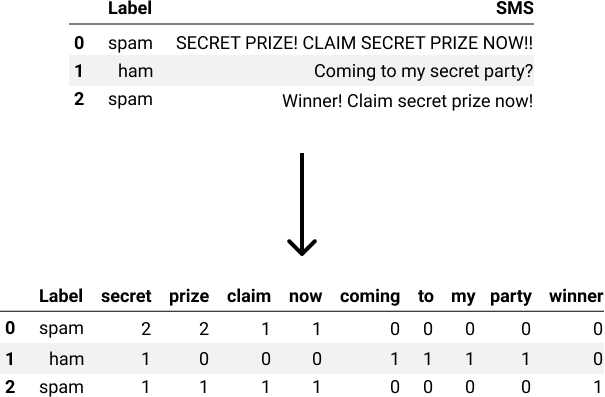

In [ ]:
# {단어: [문서1 빈도, 문서2 빈도, 문서3 빈도, ...]}로 된 딕셔너리를 작성함

# 빈 딕셔너리를 만듦 (초기화)
word_counts_dict = {}

for uniq_word in vocabulary:   # 고유 단어를 하나씩 뽑은 뒤
  word_counts_dict[uniq_word] = [0] * len(training_set_word_lists)   # 문서 길이 만큼 0 이 나열된 리스트로 초기화

print('각 문서 내 단어 빈도를 0 으로 초기화한 리스트:', word_counts_dict['cash'])
print('문서 개수(==리스트 길이):', len(word_counts_dict['cash']))

print(training_set_word_lists[2])

for doc_index, word_list in enumerate(training_set_word_lists):
   for word in word_list:   # 해당 문서에 단어가 출현하는가?
      word_counts_dict[word][doc_index] += 1   # 각 문서에서의 단어 출현 빈도를 계산

print(word_counts_dict['cash'])

In [53]:
# word_counts_dict 를 pandas 데이터프레임으로 변환함
# 그러면 아래와 같이 [문서 개수 X 고유 단어 개수]의 형태의 테이블을 얻음

word_counts_table = pd.DataFrame(word_counts_dict)
print(word_counts_table.shape)
word_counts_table.head(n=3)

(4458, 6932)


,a,aa,aah,aaniye,aathi,ab,abbey,abdomen,abeg,abel,...,zed,zeros,zf,zhong,zindgi,zoe,zogtorius,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# 훈련 데이터의 레이블 정보, 단어 리스트, 테이블 데이터를 결합함

training_set_clean = pd.concat([training_set['Label'], training_set_word_lists, word_counts_table], axis=1)
training_set_clean.head()

,Label,SMS,a,aa,aah,aaniye,aathi,ab,abbey,abdomen,...,zed,zeros,zf,zhong,zindgi,zoe,zogtorius,zouk,zs,zyada
0,ham,"[yep, by, the, pretty, sculpture]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[yes, princess, are, you, going, to, make, me,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[welp, apparently, he, retired]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,[havent],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[i, forgot, ask, all, smth, there, s, a, card,...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **2-5. 스팸/정상 문자일 확률과 특정 문자에서 단어가 올 확률을 구함**

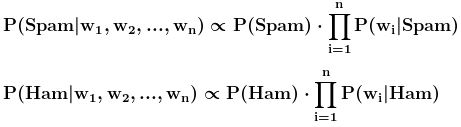

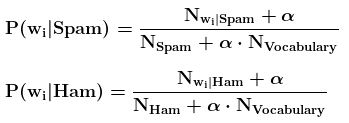

In [55]:
# 스팸/정상 문자일 확률을 계산함

# 먼저 스팸 문자와 정상 문자를 구분함
spam_messages = training_set_clean[training_set_clean['Label'] == 'spam']
ham_messages = training_set_clean[training_set_clean['Label'] == 'ham']

# 스팸일 확률 P(Spam) 과 햄일 확률 P(Ham) 을 구함
P_SPAM = len(spam_messages) / len(training_set_clean)
P_HAM = len(ham_messages) / len(training_set_clean)

# N_Spam : 스팸 문자에 들어있는 모든 단어의 개수를 셈
n_words_per_spam_message = spam_messages['SMS'].apply(len)
n_spam = n_words_per_spam_message.sum()

# N_Ham : 햄 문자에 들어있는 모든 단어의 개수를 셈
n_words_per_ham_message = ham_messages['SMS'].apply(len)
n_ham = n_words_per_ham_message.sum()

# N_Vocabulary : 고유 단어의 개수를 셈
n_vocabulary = len(vocabulary)   # 고유 단어는 위에서 구함 : vocabulary

print("P(Spam):", P_SPAM)
print("P(Ham):", P_HAM)
print("N_Spam:", n_spam)
print("N_Ham:", n_ham)
print("N_Vocabulary:", n_vocabulary)

P(Spam): 0.13458950201884254
P(Ham): 0.8654104979811574
N_Spam: 13732
N_Ham: 56377
N_Vocabulary: 6932


In [ ]:
spam_messages['cash']

In [ ]:
# 스팸/정상 문자에서의 특정 단어일 확률을 구함

# 스팸/정상 문자 속 단어들의 확률을 0으로 초기화한 딕셔너리를 정의함
parameters_spam = {unique_word:0 for unique_word in vocabulary}
parameters_ham = {unique_word:0 for unique_word in vocabulary}

'''
# 위의 표현식은 아래와 같은 결과를 출력함
parameters_spam = {}
for unique_word in vocabulary:
  parameters_spam[unique_word] = 0
'''

# Laplace smoothing을 위한 알파값을 1로 설정함
alpha = 1

# 각 단어의 확률을 계산함
for word in vocabulary:
   n_word_given_spam = spam_messages[word].sum()   # spam_messages 는 위에서 이미 정의. 스팸 문서에서의 특정 단어의 총 빈도를 계산.
   p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)   # 스팸 문서에서의 특정 단어의 확률
   parameters_spam[word] = p_word_given_spam   # 스팸 문자에서의 특정 단어의 확률 (확률 정보를 스팸 딕셔너리에 저장)

   n_word_given_ham = ham_messages[word].sum() # ham_messages 는 위에서 이미 정의. 정상 문서에서의 특정 단어의 총 빈도를 계산.
   p_word_given_ham = (n_word_given_ham + alpha) / (n_ham + alpha*n_vocabulary)   # 정상 문서에서의 특정 단어의 확률
   parameters_ham[word] = p_word_given_ham   # 정상 문자에서의 특정 단어의 확률 (확률 정보를 정상 딕셔너리에 저장)

print(parameters_ham)   

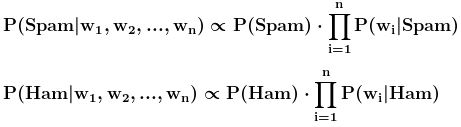

### **2-6. 나이브 베이즈 분류기로 새 문자를 스팸/정상으로 자동분류**

In [58]:
# 새로운 문자(문자열 형태)가 주어졌을 때 문자를 스팸/정상으로 자동분류

import re

def classify(message):   # def 는 함수를 정의하는 파이썬 키워드
   '''
   message: 문자 메시지를 적은 문자열
   '''
   # 구두점과 숫자 등을 제거하고 알파벳을 소문자로 변환하고 split 하여 단어 토큰을 취득
   message = message.lower()
   message = re.sub('[^a-z]+', ' ', message)
   message = message.split()

   p_spam_given_message = P_SPAM  # 이미 위에서 스팸일 확률을 계산
   p_ham_given_message = P_HAM   # 이미 위에서 정상일 확률을 계산

   for word in message:
      # 스팸 문자일 경우의 확률값을 계산: 바로 위의 수식을 구현
      # P(Spam|w1, w2, ...) = P_SPAM * P(w1|Spam) * P(w2|Spam) * ...

      if word in parameters_spam:
         p_spam_given_message *= parameters_spam[word]

      # 정상 문자일 경우의 확률값을 계산: 바로 위의 수식을 구현
      # P(Ham|w1, w2, ...) = P_HAM * P(w1|Ham) * P(w2|Ham) * ...

      if word in parameters_ham: 
         p_ham_given_message *= parameters_ham[word]

   print('P(Spam|message):', p_spam_given_message)
   print('P(Ham|message):', p_ham_given_message)

   if p_ham_given_message > p_spam_given_message:
      print('Label: Ham')
      prediction = 'ham'
   elif p_ham_given_message < p_spam_given_message:
      print('Label: Spam')
      prediction = 'spam'
   else:
      print('Equal proabilities, have a human classify this!')
      prediction = 'ham'
      
   return prediction

In [59]:
classify('WINNER!! This is the secret code to unlock the money: C3421.')

P(Spam|message): 7.785827386839791e-28
P(Ham|message): 2.039959636550236e-30
Label: Spam


'spam'

In [60]:
classify("Sounds good, Tom, then see u there")

P(Spam|message): 5.509418751605121e-25
P(Ham|message): 4.48742545145909e-21
Label: Ham


'ham'

In [61]:
classify("Congratulations! You won $1,000,000. Please subscribe to claim your prize.")

P(Spam|message): 4.03369935081006e-24
P(Ham|message): 6.745506582340476e-32
Label: Spam


'spam'

In [62]:
classify("I really need to borrow $1,000 if you can lend me some.")

P(Spam|message): 1.0344992566662752e-31
P(Ham|message): 4.689935122061422e-25
Label: Ham


'ham'

In [63]:
classify("Nokia phone on sale! Limited offer.")

P(Spam|message): 1.0186002129162906e-15
P(Ham|message): 1.3560147106298268e-18
Label: Spam


'spam'

### **2-7. 분류 정확도(Accuracy)를 계산**

In [64]:
type(test_set)

pandas.core.frame.DataFrame

In [65]:
test_set

,Label,SMS
0,ham,Later i guess. I needa do mcat study too.
1,ham,But i haf enuff space got like 4 mb...
2,spam,Had your mobile 10 mths? Update to latest Oran...
3,ham,All sounds good. Fingers . Makes it difficult ...
4,ham,"All done, all handed in. Don't know if mega sh..."
...,...,...
1109,ham,"We're all getting worried over here, derek and..."
1110,ham,Oh oh... Den muz change plan liao... Go back h...
1111,ham,CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...
1112,spam,Text & meet someone sexy today. U can find a d...


In [ ]:
# 테스트 데이터를 하나씩 꺼내서 스팸/정상 여부를 예측함
# https://www.geeksforgeeks.org/different-ways-to-iterate-over-rows-in-pandas-dataframe/

prediction = []   # 예측 결과를 넣기 위한 리스트를 선언

for idx in test_set.index:
  print(test_set['SMS'][idx])   # 문자 메시지 문자열
  prediction.append((classify(test_set['SMS'][idx])))

true_label = test_set['Label'].values

print(len(true_label))
print(len(prediction))

In [67]:
# 두 리스트를 비교하여 정확도(accuracy)를 계산함
# https://stackoverflow.com/questions/38877301/how-to-calculate-accuracy-based-on-two-lists-python

accuracy = sum(1 for x, y in zip(true_label, prediction) if x == y) / len(true_label)
print("Classification accuracy:", accuracy)

Classification accuracy: 0.9856373429084381


---
### **3. scikit-learn 라이브러리를 활용한 나이브 베이즈 분류**

앞서 나이브 베이즈 분류기를 하나부터 직접 구현해 봤습니다.

그런데 파이썬의 **scikit-learn** 기계학습 라이브러리에도 나이브 베이즈 분류기가 있습니다.

이를 활용하여 스팸/정상 문자를 신속하게 분류해 보겠습니다.

https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

### **3-1. 데이터 취득 및 전처리**

In [68]:
import pandas as pd

# 데이터를 읽어 들임
sms_spam = pd.read_csv('/content/SMSSpamCollection', sep='\t', header='infer', names=['Label', 'SMS'])
print('데이터:', sms_spam.shape)

# 데이터를 무작위로 섞어서 스팸/정상 데이터가 잘 섞이도록 함

data_randomized = sms_spam.sample(frac=1, random_state=1)

# 데이터의 80%를 훈련 데이터로(train), 나머지 20%를 테스트 데이터로(test) 구분함

# 80%를 훈련 데이터로 구분하기 위해 데이터가 80% 가 되는 지점의 인덱스를 확보함
training_test_index = round(len(data_randomized) * 0.8)

# 인덱스를 이용하여 데이터를 훈련/테스트 데이터로 구분함
training_set = data_randomized[:training_test_index].reset_index(drop=True)
test_set = data_randomized[training_test_index:].reset_index(drop=True)

# 전처리 작업: 모든 알파벳을 소문자로 변환함, 알파벳 이외의 글자를 공백으로 치환함

training_set['SMS'] = training_set['SMS'].str.lower() # 대문자를 소문자로 변환
training_set['SMS'] = training_set['SMS'].str.replace('[^a-z]+', ' ', regex=True)   # 알파벳 이외의 글자를 공백으로 치환
training_set.head(3)

데이터: (5572, 2)


,Label,SMS
0,ham,yep by the pretty sculpture
1,ham,yes princess are you going to make me moan
2,ham,welp apparently he retired


### **3-2. scikit-learn 의 CountVectorizer 로 '문서 X 단어 빈도' 테이블을 생성**

여기서는 for 문으로 훈련 데이터(training_set)를 돌려서 '문서 X 단어 빈도' 테이블을 만드는 대신 

scikit-learn 라이브러리가 제공하는 **CountVectorizer** 라는 것을 이용하여 

단번에 '문서 X 단어' 빈도 테이블을 만들어 보겠습니다.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

**CountVectorizer** 를 사용하기 위해서는 훈련 데이터의 입력 데이터가 아래와 같은 형태여야 합니다.
```
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']
```



마침 trainin_set['SMS'] 에 문자열 리스트가 정의되어 있습니다.

In [69]:
# 여기서는 training_set['SMS'] 를 입력 데이터로 사용함

training_set['SMS']

0                             yep by the pretty sculpture
1             yes princess are you going to make me moan 
2                              welp apparently he retired
3                                                 havent 
4       i forgot ask all smth there s a card on da pre...
                              ...                        
4453    sorry i ll call later in meeting any thing rel...
4454    babe i fucking love you too you know fuck it w...
4455    u ve been selected to stay in of top british h...
4456    hello my boytoy geeee i miss you already and i...
4457                                  wherre s my boytoy 
Name: SMS, Length: 4458, dtype: object

In [70]:
# CountVectorizer 를 탑재하고(import) 선언하고 훈련 데이터의 '문서 X 단어 빈도' 테이블을 생성함. 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
X_train = vectorizer.fit_transform(training_set['SMS'])

print(X_train.shape)   # '문서 X 단어 빈도' 테이블의 형태
print(vectorizer.get_feature_names_out())   # 고유 단어 목록

(4458, 6932)
['a' 'aa' 'aah' ... 'zouk' 'zs' 'zyada']


### **3-3. scikit-learn 나이브 베이즈 분류기 적용**

In [ ]:
training_set['Label']

In [72]:
# scikit-learn의 나이브 베이즈 분류기를 학습함
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()   # 분류기 객체를 선언함

# X_train 은 위에서 정의함
y_train = training_set['Label']   # 스팸/정상 레이블

nb.fit(X_train, y_train)   # 이 한줄로 필요한 예측에 필요한 모든 확률에 대한 계산을 끝냄

MultinomialNB()

In [73]:
print(y_train[0:10].values)   # 사람이 부여한 레이블 --> 정답 레이블
print(nb.predict(X_train[0:10]))   # predict 메소드로 스팸/정상을 예측하고, 더 높은 확률의 레이블을 반환 (= 나이브 베이즈 분류기의 예측값)

['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham']
['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham']


---
이번에는 테스트 데이터에 대해서 스팸/정상을 예측해 봅시다.

In [74]:
# 테스트 데이터에 대해서도 전처리를 진행함

test_set['SMS'] = test_set['SMS'].str.lower() # 대문자를 소문자로 변환
test_set['SMS'] = test_set['SMS'].str.replace('[^a-z]+', ' ', regex=True)   # 알파벳 이외의 글자를 공백으로 치환
test_set.head(3)

,Label,SMS
0,ham,later i guess i needa do mcat study too
1,ham,but i haf enuff space got like mb
2,spam,had your mobile mths update to latest orange c...


In [75]:
# CountVectorizer 로 테스트 데이터의 '문서 X 단어 빈도' 테이블을 생성함

X_test = vectorizer.transform(test_set['SMS'])   # fit_transform() 함수가 아닌 transform() 함수 적용
y_test = test_set['Label']

In [76]:
print(y_test[0:10].values)   # 사람이 부여한 레이블: gold label
print(nb.predict(X_test[0:10]))   # 예측을 진행

['ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham']
['ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham']


### **3-4. scikit-learn 의 accuracy_score 로 정확도 계산**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [77]:
# 나이브 베이즈 분류기가 얼마나 정확하게 자동 분류를 수행하는지를 테스트 데이터로 확인
# 정확도(accuracy)는 아래와 같이 계산함
# - 사람이 ham으로 분류한 메일을 나이브 베이즈 분류기가 ham으로 예측한 경우 (1 point)
# - 사람이 spam으로 분류한 메일을 나이브 베이즈 분류기가 spam으로 예측한 경우 (1 point)
# - 사람이 ham으로 분류 / 분류기가 spam으로 예측 (0 point)
# - 사람이 spam으로 분류 / 분류기가 ham으로 예측 (0 point)

from sklearn.metrics import accuracy_score   # 필요한 모듈 탑재

y_pred_test = nb.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.9856373429084381

**[참고] 훈련(train) 데이터에 대한 나이브 베이즈 분류기의 분류 정확도(accuracy)** 



In [78]:
# 먼저 훈련(train) 데이터의 예측값을 계산

y_pred_train = nb.predict(X_train)

In [79]:
# 위의 y_pred_train과 사람이 매긴 label 값인 y_train을 비교하여 정확도를 구함
# 대개 테스트 데이터의 분류 정확도보다 훈련 데이터의 분류 정확도가 더 높음

accuracy_score(y_train, y_pred_train)

0.9917003140421714

### **3-3. scikit-learn의 metrics 함수를 이용하여 accuracy, precision, recall, f1-measure를 계산**

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [80]:
# 정확도(accuracy), 정밀도(precision), 재현율(recall), F1점수(F1-score)를 계산하는 함수를 탑재함

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [81]:
# 테스트 데이터의 자동 분류 정확도(accuracy)를 계산함

accuracy_score(y_test, y_pred_test)

0.9856373429084381

In [82]:
# 스팸/정상 문자 분류에 대한 정밀도(precision)를 구함

precision_score(y_test, y_pred_test, pos_label="spam")

0.9455782312925171

In [83]:
# 스팸/정상 문자 분류에 대한 재현율(recall)을 구함
recall_score(y_test, y_pred_test, pos_label="spam")

0.9455782312925171

In [84]:
# 스팸/정상 문자 분류에 대한 F1 점수(f1-score)를 계산함
f1_score(y_test, y_pred_test, pos_label="spam")

0.9455782312925171

---
❓ 이번 실습에서는 **네이버 영화평 데이터 세트** (https://github.com/e9t/nsmc) 를 

다운로드 하여 정제한 후, 훈련 데이터와 테스트 데이터를 나누고

영화평이 긍정 영화평인지 부정 영화평인지

scikit-learn의 나이브 베이즈 분류기를 이용하여 예측하는 실습을 진행합니다.

최종적으로 테스트 데이터의 정확도(accuracy)를 출력해 주시면 됩니다.

\- \- \-

1. **데이터 전처리** (한국어 형태소분석 적용)

  훈련/테스트 데이터는 다음의 글 (https://wikidocs.net/44249) 의 

  (4) 정수 인코딩 이전까지 - 즉, (3) 토큰화까지 실행* - 진행한 후

  (*훈련/테스트 데이터가 단어 리스트 형태로 취득되는 곳까지 진행)

  단어 리스트를 공백으로 이어진 문자열로 변환해 주세요.

2. 입력 벡터 생성, 모델 학습, 예측 (vectorizer, fit / predict)

  이후 scikit-learn의 CountVectorizer 를 사용하여 문서-단어 빈도 벡터를 만들고 

  나이브 베이즈 분류기를 학습한 후, 예측을 진행하면 됩니다.

- konlpy를 설치해야 합니다.
- 네이버 영화평 데이터가 어디에 다운로드 됐는지 Colab 왼쪽에 있는 

  폴더 아이콘을 눌러서 확인하고, 
  
  train_data/test_data 변수에 데이터를 읽어 들일 때, 
  
  데이터 경로를 적절히 수정하세요.

In [ ]:
!pip install konlpy   # 한국어 형태소 분석기 konlpy를 설치함

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm

In [87]:
# 훈련 데이터와 테스트 데이터를 Colab 환경에 다운로드

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f004801c850>)

In [88]:
train_data = pd.read_table('/content/ratings_test.txt')
test_data = pd.read_table('/content/ratings_test.txt')

In [89]:
print('훈련용 리뷰 개수 :',len(train_data))

훈련용 리뷰 개수 : 50000


In [90]:
train_data['document'].nunique(), train_data['label'].nunique()

(49157, 2)

In [91]:
train_data.drop_duplicates(subset=['document'], inplace=True)

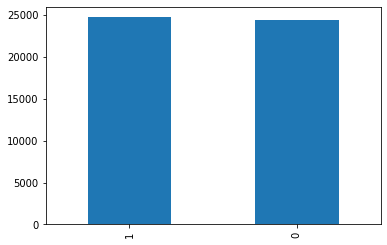

In [92]:
train_data['label'].value_counts().plot(kind = 'bar')

In [93]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True)

In [95]:
train_data['document'] = train_data['document'].str.replace('^ +', "", regex=True) # white space 데이터를 empty value로 변경
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id            0
document    305
label         0
dtype: int64


In [96]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

48852


In [97]:
# 테스트 데이터에 대해서도 전처리를 진행

test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True) # 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace('^ +', "", regex=True) # 공백은 empty 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48852


In [98]:
# 불용어를 정의함

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [99]:
okt = Okt()   # 형태소분석기 선언하기

In [100]:
# 형태소분석에 시간이 걸리기 때문에 일단 1만 개만 처리 (약 50초 소요)
# 나중에 for 문에 있는 슬라이싱 부분을 삭제

X_train = []
for sentence in tqdm(train_data['document'][:10000]):
    tokenized_sentence = okt.morphs(sentence, stem=True)   # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]   # 불용어 제거
    X_train.append(' '.join(stopwords_removed_sentence))    # 단어 리스트를 다시 문자열로 변환

100%|██████████| 10000/10000 [01:22<00:00, 120.87it/s]


In [101]:
# 형태소분석에 시간이 걸리기 때문에 일단 1천 개만 처리 (약 2초 소요)
# 나중에 for 문에 있는 슬라이싱 부분을 삭제

X_test = []
for sentence in tqdm(test_data['document'][:1000]):
    tokenized_sentence = okt.morphs(sentence, stem=True)   # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]   # 불용어 제거
    X_test.append(' '.join(stopwords_removed_sentence))   # 단어 리스트를 다시 문자열로 변환

100%|██████████| 1000/1000 [00:04<00:00, 217.76it/s]


In [ ]:
X_train  

In [103]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# '문서 X 단어 빈도' 테이블을 작성함

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()   # 단어 빈도 계산을 위한 구조체를 선언함

X_train_vect = vectorizer.fit_transform(X_train)   # 문장(문자열) 리스트를 입력으로 받음

print(vectorizer.get_feature_names_out())
len(vectorizer.get_feature_names_out())

['ㄱㄱ' 'ㄱㄱㄱ' 'ㄱㅈ' ... '힘차다' '힙합' '힛힛']


11413

In [104]:
X_train_vect   # 벡터의 모양 : 1만 개의 훈련 데이터 X(곱하기) 1만 1,413개의 고유 단어

<10000x11413 sparse matrix of type '<class 'numpy.int64'>'
	with 79262 stored elements in Compressed Sparse Row format>

In [105]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()   # 나이브베이즈 분류기 객체를 선언함

y_train = train_data['label']   # 긍정/부정 레이블(1, 0)을 y_train 변수에 넣음

nb.fit(X_train_vect, y_train[:10000])   # 이 한줄로 필요한 확률에 대한 계산을 끝냄

# 위에서는 일단 1만 개의 훈련 데이터에 대해서 분류기를 학습하였기 때문에
# 레이블 데이터인 y_train 도 상위 1만 개로 국한함

MultinomialNB()

In [106]:
# 이때 주의할 점은 vector.fit_transform()이 아니라 
# vector.transform() 으로 테스트 데이터의 빈도 벡터를 생성해야 한다는 점임

X_test_vect = vectorizer.transform(X_test)   # 테스트 데이터도 단어 빈도 벡터 형태로 변환

y_pred_test = nb.predict(X_test_vect)   # 테스트 데이터의 긍정/부정 레이블을 예측 = 자동 분류

In [107]:
# 테스트 데이터의 성능을 평가함

from sklearn.metrics import accuracy_score

y_test = test_data['label']   # 긍정/부정 레이블(1, 0)

accuracy_score(y_test[:1000], y_pred_test)

0.899